In [1]:
import matplotlib.pyplot as plt
import os
import pickle
from tensorflow import keras
from PIL import Image
import numpy as np
import random

In [2]:
src_dir = 'o:/wikiart/Contemporary_Realism'

In [41]:
files = list(os.listdir(src_dir))
random.shuffle(files)
imgs = []
for f in files:
    im = Image.open(os.path.join(src_dir,f))
    if not im:
        continue
    if 0.9<im.width/im.height<1.2:
        imgs.append(np.array(im.resize((112,112))))

In [42]:
vgg = keras.applications.vgg16.VGG16(include_top=False,weights='imagenet')
ims = keras.applications.vgg16.preprocess_input(np.array(imgs))
res = vgg.predict(ims)

In [44]:
r = res.reshape((-1,3*3*512))
r.shape

(133, 4608)

In [45]:
from sklearn.cluster import KMeans, SpectralClustering
cl = KMeans(n_clusters=3)
#cl = SpectralClustering(n_clusters=5)
cl.fit(r)
pr = cl.predict(r)
print(pr)

[1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 2 0]


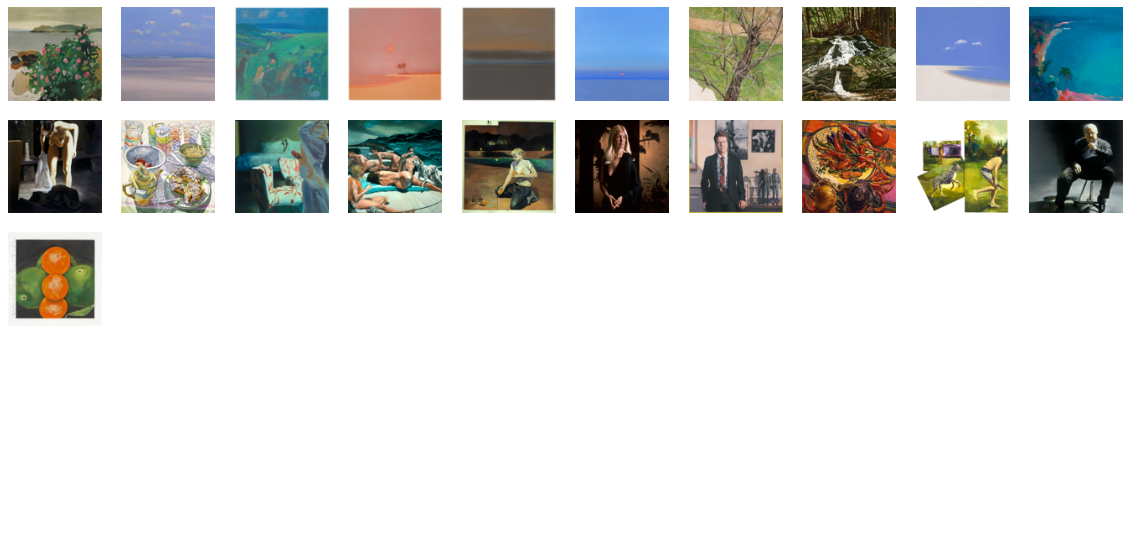

In [46]:
d = { i:[] for i in range(5) }
for i,c in enumerate(pr):
    d[c].append(imgs[i])
mx = min(10,max([len(z) for z in d.values()]))

fig, ax = plt.subplots(5,mx,figsize=(20,10))
for j in range(5):
    for i in range(mx):
        ax[j,i].axis('off')
    for i,im in enumerate(d[j][:mx]):
        ax[j,i].imshow(im)
plt.show()
